In this assignment, you will explore and implement the properties of a primary deep learning model called ***multilayer perceptron(MLP)***. Basically, the goal of an MLP is to learn a non-linear mapping from inputs to outputs. We can show this mapping as $y = f(x; \theta)$ , where $x$ is the input and $\theta$ is a vector of all the parameters in the network, which we're trying to learn.  


As you see in the figure, every MLP network consists of an input layer, an output layer, and one or more hidden layers in between. Each layer consists of one or more cells called Neurons. In every Neuron, a dot product between the inputs of the cell and a weight vector is calculated. Theresult of the dot product then goes through a non-linear function (activation function e.g. $tanh$ or $sigmoid$) and gives us the output of the neuron.


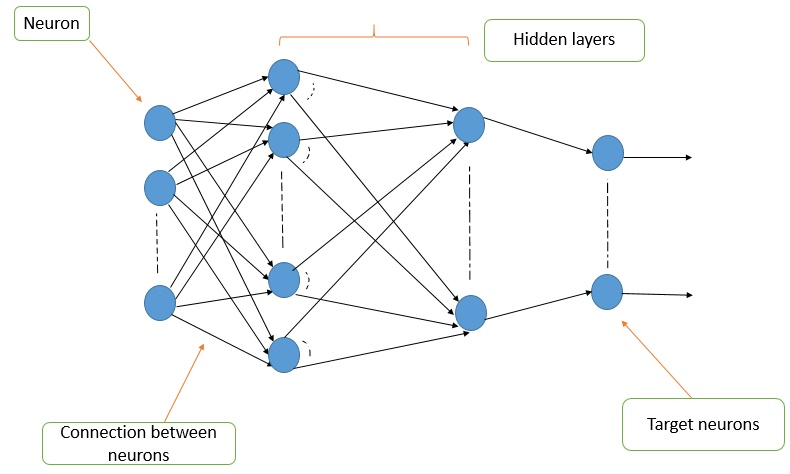



Numpy is the only package you're allowed to use for implementing your MLP in this assignment.

usefule links for MLP:
* [link 1](https://github.com/amanchadha/coursera-deep-learning-specialization/blob/master/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/Logistic_Regression_with_a_Neural_Network_mindset_v6a.ipynb)
* [link 2](https://github.com/amanchadha/coursera-deep-learning-specialization/blob/master/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%203/Planar%20data%20classification%20with%20one%20hidden%20layer/Planar_data_classification_with_onehidden_layer_v6c.ipynb)
*[link 3](https://www.anotsorandomwalk.com/backpropagation-example-with-numbers-step-by-step/)

# MLP Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

##Inital paramere
In this function, hyperparameters such as weight and bias are randomly initialized. By determining the number of layers and the number of neurons in each layer, the definition of variables is done automatically and parametrically and is stored in a dictionary called parameter. Any parameter can be used with the desired keys W ,b.

In [2]:
def init_parameters(num_layers, num_neuron):
    
    # np.random.seed(100) # for reproducibility
    
    parameters = {}
    
    for l in range(num_layers - 1):
        parameters["W"+str(l+1)] = np.random.uniform(size=(num_neuron[l],num_neuron[l+1])) 
        parameters["b"+str(l+1)] = np.random.uniform(size=(1,num_neuron[l+1]))
        print("W{} shape:{}, b{} shape:{}".\
              format(str(l+1), parameters["W"+str(l+1)].shape, str(l+1), parameters["b"+str(l+1)].shape))
      
    return parameters

##activation function
The activation function is defined as a sigmoid function.

In [3]:
def linear_forward(W, X, b):
    return (X @ W)+b

def sigmoid_activation_function(x): 
    for i in x:
        for j in i: 
            if j > 0 : j = min(sys.float_info.min, -j)
            else : j = max(sys.float_info.max, -j)
    return 1/(1+np.exp(-x)) 

def sigmoid_activation_function_derivation(x):
    #x is output of sigmoid function
    return x * (1-x) 

##forward pass
In this function, input X is given to the network and it goes forward layer by layer. First, the input is matrix multiplied by the weight of the matrix and the bias is added to it, and finally the activation function is applied to it. The output of each input layer goes as input to the neurons of the next layer, and this continues until it reaches the last layer.

In [4]:
def forward_propagation(param, X, num_layers):
    a = np.copy(X)

    for l in range(num_layers - 1):
        param["Z"+str(l+1)] = linear_forward(param["W"+str(l+1)], a, param["b"+str(l+1)])
        param["S"+str(l+1)] = sigmoid_activation_function(param["Z"+str(l+1)])
        a = param["S"+str(l+1)]
    
    return param

##backward pass
In this function, the error is calculated by the difference between the output of the last layer and the desired output. The error is then multiplied by the derivative of the activation function of the last layer. This error is then multiplied by the weight of the last layer and the bias of the last layer. This error is then added to the error of the previous layer. This process is repeated until the error of the first layer is calculated.

In [5]:
def backpropagation(X, y, param, num_layers, learning_rate):
    errors = []
    for l in reversed(range(num_layers)):
        if l == num_layers -1 : #last layer
            param["delta"+str(l)] = (param["S"+str(l)] - y) * sigmoid_activation_function_derivation(param["S"+str(l)])
            if num_layers == 2: #mlp with out hidden layer
                param['W{}_gradients'.format(str(l))] = X.T @ param["delta"+str(l)]
            else:
                param['W{}_gradients'.format(str(l))] = param["S"+str(l - 1)].T @ param["delta"+str(l)]
        elif l == 0:
            break
        elif l == 1: #first layer
            param["delta"+str(l)] = (param["delta"+str(l + 1)] @ param["W"+str(l+1)].T )* sigmoid_activation_function_derivation(param["S"+str(l)])
            param['W{}_gradients'.format(str(l))] = X.T @ param["delta"+str(l)] 
        else: #hidden layers
            param["delta"+str(l)] = (param["delta"+str(l + 1)] @ param["W"+str(l+1)].T )* sigmoid_activation_function_derivation(param["S"+str(l)])
            param['W{}_gradients'.format(str(l))] = param["S"+str(l - 1)].T @ param["delta"+str(l)]
            break

        
        # update weights
        param["W"+str(l)] = param["W"+str(l)] - param['W{}_gradients'.format(str(l))] * learning_rate
        # update bias
        param["b"+str(l)] = param["b"+str(l)] - np.sum(param["delta"+str(l)], axis=0, keepdims=True) * learning_rate
        
        
    return errors, param

##train
In this function, the forward pass and backward pass are done for the number of epochs. The weights and biases are updated after each epoch.
First the parameter is initialized, then for a specific number of iterations the data is entered as input to the network and the error is calculated for each network input. The weights are updated with backpacking and finally the network is trained. The trained weights can be used for further estimates.

In [6]:
def train(X, y, num_layers, num_neuron, epochs=10, learning_rate=0.001):

    param = init_parameters(num_layers, num_neuron)

    for e in range(epochs):
        param = forward_propagation(param, X, num_layers)
        _, param = backpropagation(X, y, param, num_layers, learning_rate)

    return _, param

##predict 
In this function, the trained weights and biases are used to predict the output of the network. The input is given to the network and the output is returned.

In [7]:
def predict(X, param, num_layers):
    a = np.copy(X)
    
    for l in range(num_layers - 1):
        param["Z"+str(l+1)] = linear_forward(param["W"+str(l+1)], a, param["b"+str(l+1)])
        param["S"+str(l+1)] = sigmoid_activation_function(param["Z"+str(l+1)])
        a = param["S"+str(l+1)]
    
    return param["S"+str(num_layers - 1)]

#Part1

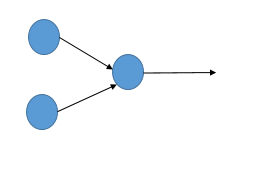

In [ ]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples,1) dimension
   weights : a matrix with (2,1) dimension
   bias: a vector with (1) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''

##here we want to learn 'and' Function

In [22]:
# here we want to learn 'and' Function

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
num_layers = 2
num_neuron = [2, 1]
_, param = train(x, y, num_layers, num_neuron, epochs=600, learning_rate=0.1)

y_pred = predict(x, param, num_layers)
print(y_pred)
print(np.where(y_pred > 0.5, 1, 0))

W1 shape:(2, 1), b1 shape:(1, 1)
[[0.0392689 ]
 [0.23760971]
 [0.23852307]
 [0.7048786 ]]
[[0]
 [0]
 [0]
 [1]]


## here we want to learn 'or' Function

In [23]:
# here we want to learn 'or' Function

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
num_layers = 2
num_neuron = [2, 1]
_, param = train(x, y, num_layers, num_neuron, epochs=600, learning_rate=0.1)

y_pred = predict(x, param, num_layers)
print(y_pred)
print(np.where(y_pred > 0.5, 1, 0))

W1 shape:(2, 1), b1 shape:(1, 1)
[[0.2711895 ]
 [0.8421673 ]
 [0.84444512]
 [0.98731689]]
[[0]
 [1]
 [1]
 [1]]


##TA Implemenration


In [156]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples,1) dimension
   weights : a matrix with (2,1) dimension
   bias: a vector with (1) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''
import numpy as np
def generate_data():
  x = []
  y = []
  for i in range(10000):
    x_1 = np.random.rand(1)[0]
    x_2 = np.random.rand(1)[0]
    x.append([x_1,x_2])
    y.append((x_1+x_2))
  return x, y
  
def mse_loss(desierd, predict):
  return (pow((desierd-predict), 2))

def stochastic_gradient_descent(weights, activation, lr, feed_out, desierd, x):
    derivative = 1
    if activation == 'Sigmoid': 
        derivative = lambda x :(x) * (1 - x)
    elif activation == 'Tanh':
        derivative = lambda x: 1 - np.power(x, 2)
    elif activation == 'ReLU':
        derivative = lambda x: 1 if x > 0 else 0
    elif activation == 'Leaky_ReLU':  #leaky relu
        derivative = lambda x: 1 if x > 0 else 0.01
    
    #calculate gradient
    gradient = (feed_out - desierd) * derivative(feed_out)

    #update parameters
    for w, x_i in zip(weights, x):
        w += lr * gradient * x_i

    return weights

def mlp(x, y, lr, num_layers, num_neuron, epochs):
    activation_function_sigmoid = lambda variable: [1/(np.exp(min(sys.float_info.min,-1*variable)) + 1) if variable>0  else 1/(np.exp(min(sys.float_info.max,-1*variable)) + 1)]
    activation_function_tanh = lambda X: [np.tanh(X)]
    # activation_function_relu = lambda X: [max(0,X)]
    activation_function_leaky_relu = lambda X: [max(0.01*X,X)]

    weights = np.random.uniform(low=-1, high=1, size=(num_neuron[0],num_neuron[1]))
    bias = np.random.uniform(low=-1, high=1, size=(num_neuron[1]))
    print("weight : ", weights,"\nbias: ", bias)
    for e in range(epochs):
        feed_forward = []
        for x_i, y_i in zip(x, y):
    
            h = np.dot(x_i, weights) + bias
            y_hat = activation_function_sigmoid(h)
            weights = stochastic_gradient_descent(weights = weights, activation = 'Sigmoid',\
                                                lr = lr, feed_out = y_hat[-1], desierd = y_i, x = x_i)
            bias = stochastic_gradient_descent(weights = bias, activation = 'Sigmoid',\
                                                lr = lr, feed_out = y_hat[-1], desierd = y_i, x = x_i)

    #test
    x= [0.1, 0.2]      
    #this function is X1 + X_2 
    output = activation_function_sigmoid(np.dot(x, weights) + bias)
    print("Test:", output[0])

x, y = generate_data()
mlp(x,y,0.1, 2,[2,1], 15)     

weight :  [[0.56206582]
 [0.20132709]] 
bias:  [-0.18074838]
Test: [0.0332649]


#Part2

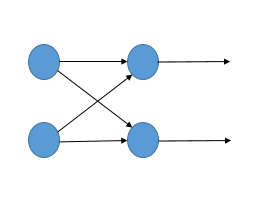

##here we want to learn 'and', 'or' Function

In [ ]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples, 2) dimension
   weights : a matrix with (2,2) dimension
   bias: a vector with (2) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''
# here we want to learn 'and', 'or' Function
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 0], [1, 0], [1, 0], [1, 1]])
num_layers = 2
num_neuron = [2,2]
_, param = train(x, y, num_layers, num_neuron, epochs=500, learning_rate=0.1)

y_pred = predict(x, param, num_layers)
print(y_pred)
print(np.where(y_pred > 0.5, 1, 0))

0
W1 shape:(2, 2), b1 shape:(1, 2)
[[0.2883477  0.0478484 ]
 [0.83427746 0.25170109]
 [0.83578328 0.24802721]
 [0.98443213 0.68825305]]
[[0 0]
 [1 0]
 [1 0]
 [1 1]]


# Part3

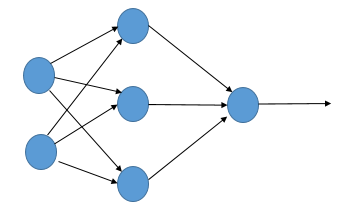

##here we want to learn XOR Function

In [57]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples, 1) dimension
   weights : a matrix with ((2,3), (3,1)) dimension
   bias: a vector with ((3),(1)) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''

# here we want to learn XOR Function

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
num_layers = 3
num_neuron = [2, 3, 1]
_, param = train(x, y, num_layers, num_neuron, epochs=5000, learning_rate=0.1)

y_pred = predict(x, param, num_layers)
print(y_pred)
print(np.where(y_pred > 0.5, 1, 0))

W1 shape:(2, 3), b1 shape:(1, 3)
W2 shape:(3, 1), b2 shape:(1, 1)
[[0.12631594]
 [0.8567593 ]
 [0.8562489 ]
 [0.16844012]]
[[0]
 [1]
 [1]
 [0]]


#Part4

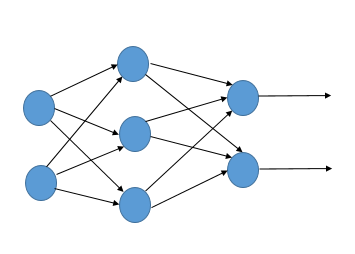

##here we want to learn XOR Function, XNOR Function

In [58]:
'''
   implement above network
   inputs : a matrix with (n_samples,2,1) dimension
   output: our target with (n_samples, 2) dimension
   weights : a matrix with ((2,3), (3,2)) dimension
   bias: a vector with ((3),(2)) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''

# here we want to learn XOR Function, XNOR Function
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])
num_layers = 3
num_neuron = [2, 3, 2]
_, param = train(x, y, num_layers, num_neuron, epochs=5000, learning_rate=0.1)

y_pred = predict(x, param, num_layers)
print(y_pred)
print("here we want to learn XOR Function, XNOR Function")
print(np.where(y_pred > 0.5, 1, 0))

W1 shape:(2, 3), b1 shape:(1, 3)
W2 shape:(3, 2), b2 shape:(1, 2)
[[0.11525254 0.88342869]
 [0.90037809 0.11022972]
 [0.86795961 0.13109153]
 [0.13109103 0.86312579]]
here we want to learn XOR Function, XNOR Function
[[0 1]
 [1 0]
 [1 0]
 [0 1]]


#Part5

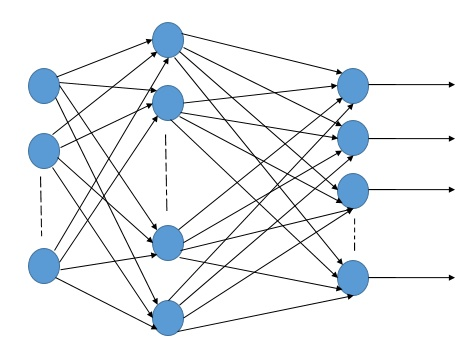

##here we want to learn XOR Function, XNOR, and, or Function

In [90]:
'''
   implement above network
   inputs : a matrix with (n_samples,n,1) dimension
   output: our target with (n_samples, m) dimension
   weights : a matrix with ((input_dimension, hidden_layer_dimension), (hidden_layer_dimension,output_dimension)) dimension
   bias: a vector with ((3),(1)) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 1]])
num_layers = 3
num_neuron = [2, 20, 4]
_, param = train(x, y, num_layers, num_neuron, epochs=2000, learning_rate=0.1)

y_pred = predict(x, param, num_layers)
print(y_pred)
print("here we want to learn XOR Function, XNOR, and, or Function")
print(np.where(y_pred > 0.5, 1, 0))

W1 shape:(2, 20), b1 shape:(1, 20)
W2 shape:(20, 4), b2 shape:(1, 4)
[[3.25615576e-01 6.54655682e-01 6.23278031e-04 8.23832639e-02]
 [6.54012624e-01 3.69261145e-01 8.77162327e-02 9.49376755e-01]
 [6.46186060e-01 3.76943901e-01 8.17499287e-02 9.43298066e-01]
 [3.93854014e-01 5.77093941e-01 8.86625932e-01 9.98887081e-01]]
here we want to learn XOR Function, XNOR, and, or Function
[[0 1 0 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 1]]


In [9]:
#x : x1, x2, x3, x4
#y : x1 and x2, x1 or x2, x1 and x3, x1 or x3, x1 and x4, x1 or x4
x = np.array([[0, 0, 0, 0], [0, 1, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1]])
y = np.array([[0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 1]])
num_layers = 3
num_neuron = [4, 20, 4]
_, param = train(x, y, num_layers, num_neuron, epochs=2000, learning_rate=0.1)

y_pred = predict(x, param, num_layers)
print(y_pred)
print("here we want to learn y : x1 and x2, x1 or x2, x1 and x3, x1 or x3, x1 and x4, x1 or x4")
print(np.where(y_pred > 0.5, 1, 0))

W1 shape:(4, 20), b1 shape:(1, 20)
W2 shape:(20, 4), b2 shape:(1, 4)
[[0.19862543 0.99445023 0.00238221 0.0834373 ]
 [0.78555906 0.99964747 0.11661736 0.95630633]
 [0.78341256 0.99971223 0.10741211 0.94129215]
 [0.24533745 0.99993277 0.84904659 0.99668043]]
here we want to learn XOR Function, XNOR, and, or Function
[[0 1 0 0]
 [1 1 0 1]
 [1 1 0 1]
 [0 1 1 1]]


add more hidden layer

#part6(preferential)

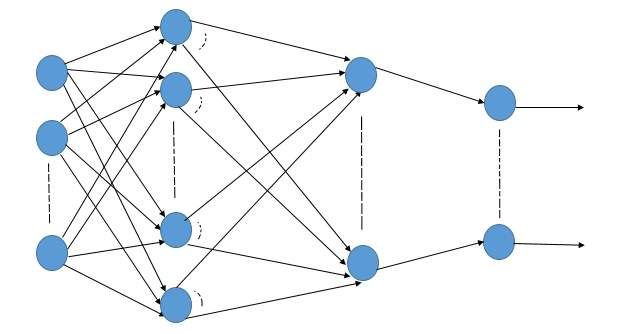

In [ ]:
'''
   implement above network
   inputs : a matrix with (n_samples,n,1) dimension
   output: our target with (n_samples, m) dimension
   weights : a matrix for each layer with ((Previous_layer, layer_dimension)) dimension
   bias: a vector for each layer with (layer_dimension) dimension
   use activation function on output of neuron
   choose compatible loss function
   use stochastic gradient descent optimizer
'''

In [128]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 1]])
num_layers = 4
num_neuron = [2, 6, 6, 4]
_, param = train(x, y, num_layers, num_neuron, epochs=90000, learning_rate=0.3)

y_pred = predict(x, param, num_layers)
print(y_pred)
print("here we want to learn XOR Function, XNOR, and, or Function")
print(np.where(y_pred > 0.5, 1, 0))

W1 shape:(2, 6), b1 shape:(1, 6)
W2 shape:(6, 6), b2 shape:(1, 6)
W3 shape:(6, 4), b3 shape:(1, 4)
[[0.43523802 0.56448641 0.05981384 0.34100969]
 [0.51479406 0.48630475 0.20728994 0.73800479]
 [0.51034382 0.48889745 0.32738909 0.84075029]
 [0.55399108 0.44596121 0.56086655 0.94165212]]
here we want to learn XOR Function, XNOR, and, or Function
[[0 1 0 0]
 [1 0 0 1]
 [1 0 0 1]
 [1 0 1 1]]


In [152]:
def generate_data():
  x = []
  y = []
  for i in range(10000):
    x_1 = np.random.rand(1)[0]/2
    x_2 = np.random.rand(1)[0]/2
    x_3 = np.random.rand(1)[0]/2
    x.append([x_1,x_2, x_3])
    y.append([x_1+x_2, x_1+x_3, x_2+x_3, x_3-x_1])
  return np.array(x), np.array(y)

x, y = generate_data()
num_layers = 3
num_neuron = [3, 5,4]
_, param = train(x, y, num_layers, num_neuron, epochs=500, learning_rate=0.3)

x_test = [[0.1, 0.2, 0.3]]
y_test = [[0.3, 0.4, 0.5, 0.2]]
y_pred = predict(x_test, param, num_layers)
print(y_pred)


W1 shape:(3, 5), b1 shape:(1, 5)
W2 shape:(5, 4), b2 shape:(1, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


[[4.90494442e-157 1.40262090e-218 3.23418144e-254 0.00000000e+000]]


##class base implementation

In [109]:
class multi_layer_perceptrons(object):
    '''
        Here defined the needed variable.
        
        Layers is an integer array that len(layers) shows 
            the number of layer and each number in it shows a number of neurons in each MLP layer.
        
        Weights is a list of numpy arrays(2D Matrix) that 
            each array refers to weighs between 2 continuous layers.
    '''
    def __init__(self, layers = [1 , 10, 1], activations=['sigmoid', 'sigmoid']):
        
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            print("initial parameter: ({}, {})".format(layers[i], layers[i+1]))
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def fit(self, x):
        '''
        feed-forward process in multi layer perceptron.
        In this function, we iterate over all layers and calculate h (using weights and bias), 
        and then y_ predict (from h using the activation function). 
        in the end, we have all the outputs of all the neurons in each layer.

            x            : is input data
            layer_input  : output of each layer that uses as input of next layer, 
                           in the first layer, a and x are the same.
            h            : The output of each neuron of each layer ''before'' the activation function takes effect.
            y_prediction : The output of each neuron of each layer ''after'' the activation function takes effect.

        '''
        a = np.copy(x)
        z_s = []
        a_s = [x]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    
    def backpropagation(self,y, z_s, a_s):

            dw = []  
            db = []  
            errors = [None] * len(self.weights)  
            derivition_activation_function = self.getDerivitiveActivationFunction(self.activations[-1])
            errors[-1] = ((y-a_s[-1])*derivition_activation_function(z_s[-1]))
            
            for i in reversed(range(len(errors)-1)):
                derivition_activation_function = self.getDerivitiveActivationFunction(self.activations[-1])
                errors[i] = self.weights[i+1].T.dot(errors[i+1])*derivition_activation_function(z_s[i])      
            
            batch_size = y.shape[1]
            db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in errors]
            dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(errors)]
            
            return dw, db
            
    def train(self, x, y, epochs=1000, lr = 0.1):
    
        for e in range(epochs): 
            z_s, a_s = self.fit(x)
            dw, db = self.backpropagation(y, z_s, a_s)
            self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
            self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
    
    @staticmethod
    def getActivationFunction(name):
        return lambda x : np.exp(x)/(1+np.exp(x))
        
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        sig = lambda x : np.exp(x)/(1+np.exp(x))
        return lambda x :sig(x)*(1-sig(x))

def main(layer , activations , X, Y, X_test, Y_test, epochs = 50, lr = 0.5):
    
    mlp = multi_layer_perceptrons(layer,activations)
    
    mlp.train(X, Y, epochs,lr)
    
    _, train = mlp.fit(X)
    
    plt.scatter(X.flatten(), Y.flatten())
    plt.scatter(X.flatten(), train[-1].flatten())
    plt.show()

    _, prediction = mlp.fit(X_test)

    plt.plot(X_test.flatten(), Y_test.flatten(), label='Actual')
    plt.plot(X_test.flatten() ,prediction[-1].flatten(), label='Predicted')
    plt.legend()
    plt.show()


initial parameter: (1, 100)
initial parameter: (100, 1)


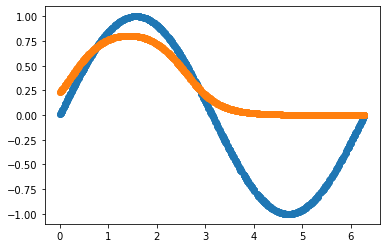

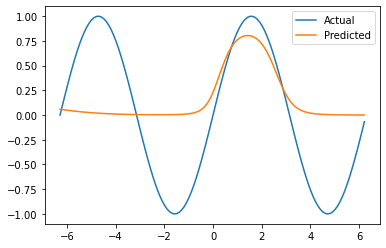

In [52]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x)
x_test = np.arange(-2*np.pi, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 100, 1]
activations =['sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 150, 0.5)

initial parameter: (1, 128)
initial parameter: (128, 64)
initial parameter: (64, 1)


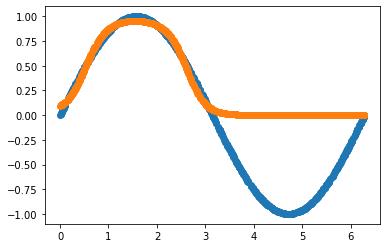

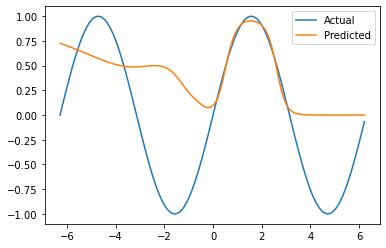

In [54]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x)

x_test = np.arange(-2*np.pi, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 1500, 0.5)

initial parameter: (1, 128)
initial parameter: (128, 64)
initial parameter: (64, 32)
initial parameter: (32, 1)


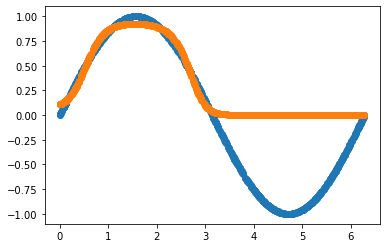

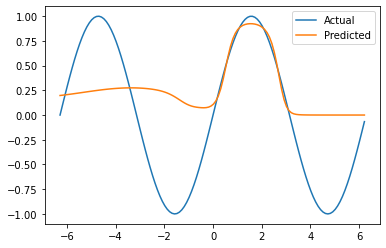

In [56]:
x = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = np.sin(x)

x_test = np.arange(-2*np.pi, 2*np.pi, 0.1).reshape(1, -1)
y_test = np.sin(x_test)

layer = [1, 128, 64, 32, 1]
activations =['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']
main(layer , activations, x, y, x_test, y_test, 2000, 0.5)